# Convolutional kernels - blurring, thresholds, edge detection

In [1]:
# We need to include the home directory in our path, so we can read in our own module.
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt

In [22]:
    filename = os.path.join(
        "..", 
        "..", 
        "..",
        "cds-vis-data", 
        "data", 
        "img", 
        "trex.png"
    )

In [23]:
image = cv2.imread(filename)

## Blur using convolutional kernels

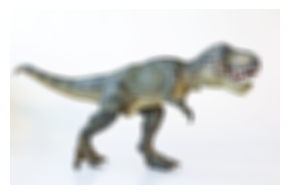

In [13]:
# Averaging blur | Params = kernel size
show(cv2.blur(image, (11,11)))

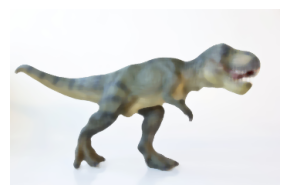

In [20]:
# Median blur | params = kernel size (int)
show(cv2.medianBlur(image, 7))

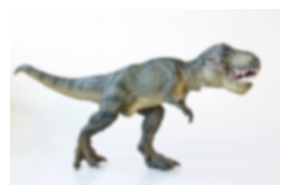

In [26]:
# Gaussian blur
show(cv2.GaussianBlur(image, (11,11), 0))

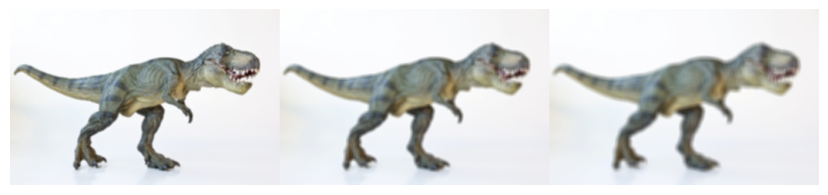

In [28]:
# NumPy stack 
blurred_stack = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (7,7)),
])

show(blurred_stack)

## Thresholding

In [33]:
image = cv2.imread(filename)

In [34]:
# Convert to greyscale
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

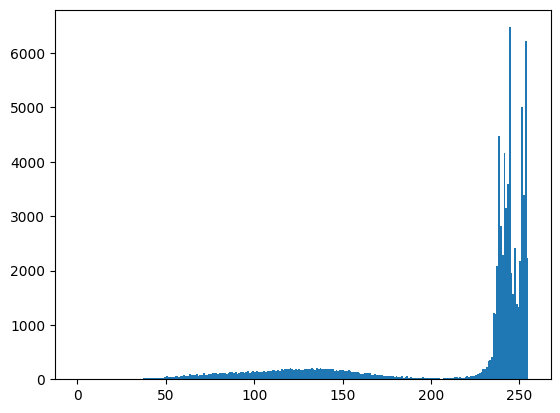

In [36]:
# Show histogram of greayscale img
plt.hist(grey.flatten(), 255)
plt.show()

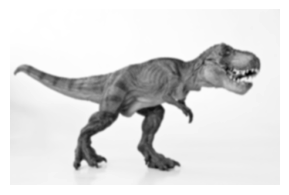

In [37]:
blurred = cv2.GaussianBlur(grey, (5,5), 0)
show_channel(blurred)

In [ ]:
plt.hist(blurred.flatten(), 255)
plt.show()

In [53]:
threshold_val, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)


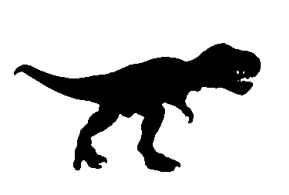

In [54]:
show_channel(binary_image)

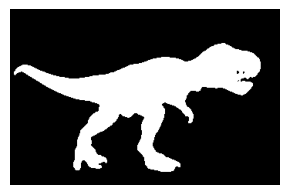

In [50]:
show_channel(cv2.bitwise_not(binary_image))

In [55]:
threshold_val, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY_INV)

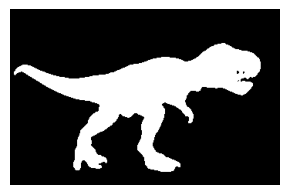

In [56]:
show_channel(binary_image)

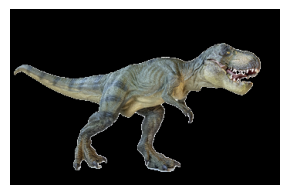

In [58]:
show(cv2.bitwise_and(image, image, mask = binary_image))

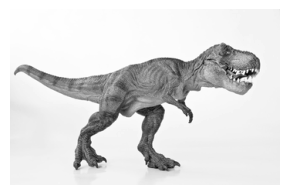

In [59]:
show_channel(grey)

## Sobel kernels

In [79]:
sobel_horizontal = cv2.Sobel(grey, cv2.CV_64F, 1, 0)
sobel_vertical = cv2.Sobel(grey, cv2.CV_64F, 0, 1)

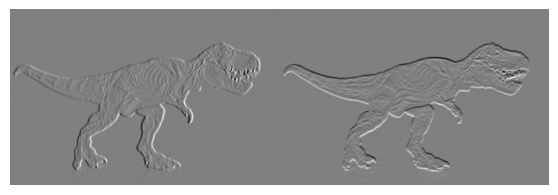

In [80]:
edges = np.hstack([
    sobel_horizontal,
    sobel_vertical
])
show_channel(edges)

In [81]:
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

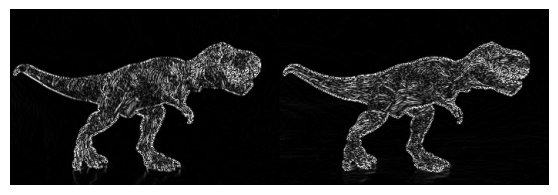

In [82]:
edges = np.hstack([
    sobelX,
    sobelY
])
show_channel(edges)